In [1]:
# project: p11
# submitter: yzhang2232
# partner: none
# hours: 3

In [2]:
%matplotlib inline

In [3]:
import pandas as pd
import os
import json
import csv
from collections import namedtuple

def scatter(x, y, xlabel="please label me!", ylabel="please label me!"):
    df = pd.DataFrame({"x":x, "y":y})
    ax = df.plot.scatter(x="x", y="y", color="black", fontsize=16, xlim=0, ylim=0)
    ax.set_xlabel(xlabel, fontsize=16)
    ax.set_ylabel(ylabel, fontsize=16)
    ax.get_xaxis().get_major_formatter().set_scientific(False)
    ax.get_yaxis().get_major_formatter().set_scientific(False)

In [4]:
def process_csv(filename):
    example_file = open(filename, encoding="utf-8")
    example_reader = csv.reader(example_file)
    example_data = list(example_reader)
    example_file.close()
    return example_data

def transform(header, data):
    dict_list = []
    for row in data:
        new_row = {}
        for i in range(len(row)):
            new_row[header[i]] = row[i]
        dict_list.append(new_row)
    return dict_list

Tweet = namedtuple('Tweet', ['tweet_id', 'username', 'num_liked', 'length'])

def get_csv_tweets(csv_path):
    csv_file = process_csv(csv_path)
    header = csv_file[0]
    data = csv_file[1:]
    files = transform(header,data)
    tweets = []
    for file in files:
        if len(file) != 6:
            pass
        else:
            if file["num_liked"][-1].upper() == 'M':
                tweet = Tweet(file['tweet_id'], file['username'], int(file['num_liked'].replace(file['num_liked'][-1], '000000')), len(file['tweet_text']))
            elif file["num_liked"][-1].upper() == 'k':
                tweet = Tweet(file['tweet_id'], file['username'], int(file['num_liked'].replace(file['num_liked'][-1], '000')), len(file['tweet_text']))
            else:
                tweet = Tweet(file['tweet_id'], file['username'], int(file['num_liked']), len(file['tweet_text']))
            tweets.append(tweet)
    return tweets

def get_json_tweets(json_path):
    try:
        t = open(json_path, encoding = "utf-8")
        json_str = t.read()
        t.close()
        data = json.loads(json_str)
    except:
        return []
    tweets = []
    for d in data:
        try:
            assert type(data[d]['num_liked']) == int
            tweet = Tweet(d,data[d]['username'],data[d]['num_liked'],len(data[d]['tweet_text']))
        except:
            if type(data[d]['num_liked']) == str:
                if data[d]['num_liked'][-1].upper() == 'M':
                    tweet = Tweet(d,data[d]['username'],int(data[d]['num_liked'].replace(data[d]['num_liked'][-1],'000000')),len(data[d]['tweet_text']))
                elif data[d]['num_liked'][-1].upper() == 'K':
                    tweet = Tweet(d,data[d]['username'],int(data[d]['num_liked'].replace(data[d]['num_liked'][-1],'000')),len(data[d]['tweet_text']))
                else:
                    tweet = Tweet(d,data[d]['username'],0,len(data[d]['tweet_text']))
            else:
                tweet = Tweet(d,data[d]['username'],0,len(data[d]['tweet_text']))
        tweets.append(tweet)
    return tweets

def find_all(dic):
    file_list = os.listdir(dic)
    all_tweets = []
    for file in file_list:
        path = os.path.join(dic,file)
        if '.CSV' in file.upper():
            tweets = get_csv_tweets(path)
        else:
            tweets = get_json_tweets(path)
        all_tweets.extend(tweets)
    return all_tweets

In [5]:
#q1
full_data = find_all("full_data")
unique_length = {}
for data in full_data:
    if data.length not in unique_length:
        unique_length[data.length] = 1
    unique_length[data.length] += 1

len(unique_length)

131

In [6]:
#q2
username_list = []
for data in full_data:
    if data.username not in username_list:
        username_list.append(data.username)
username_list

['USERID_1',
 'USERID_2',
 'USERID_6',
 'USERID_7',
 'USERID_4',
 'USERID_8',
 'USERID_5',
 'USERID_10',
 'USERID_9',
 'USERID_3']

In [7]:
#q3
user_num_tweet_dic = {}
for data in full_data:
    if data.username not in user_num_tweet_dic:
        user_num_tweet_dic[data.username] = 0
    user_num_tweet_dic[data.username] += 1
user_num_tweet_dic

{'USERID_1': 52,
 'USERID_2': 47,
 'USERID_6': 51,
 'USERID_7': 55,
 'USERID_4': 35,
 'USERID_8': 31,
 'USERID_5': 46,
 'USERID_10': 45,
 'USERID_9': 44,
 'USERID_3': 39}

In [8]:
#q4
def bucketize(dictionary, category):
    buckets = {}
    for data in dictionary:
        if category == 'tweet_id':
            tweet_id = data.tweet_id
            if tweet_id not in buckets:
                buckets[tweet_id] = []
            buckets[tweet_id].append(data)
        elif category == 'username':
            username = data.username
            if username not in buckets:
                buckets[username] = []
            buckets[username].append(data)
        elif category == 'num_liked':
            liked = data.num_liked
            if liked not in buckets:
                buckets[liked] = []
            buckets[liked].append(data)
        elif category == 'length':
            length = data.length
            if length not in buckets:
                buckets[length] = []
            buckets[length].append(data)
    return buckets

user_dic = bucketize(full_data, "username")
user_to_length = {}
for username in user_dic:
    longest = 0
    user = user_dic[username]
    for i in range(len(user)):
        if longest == 0 or user[i].length > longest:
            longest = user[i].length
    user_to_length[username] = longest
user_to_length

{'USERID_1': 150,
 'USERID_2': 138,
 'USERID_6': 145,
 'USERID_7': 144,
 'USERID_4': 138,
 'USERID_8': 145,
 'USERID_5': 146,
 'USERID_10': 136,
 'USERID_9': 137,
 'USERID_3': 138}

In [9]:
#q5
largest_like = {}
for username in user_dic:
    largest = 0
    user = user_dic[username]
    for i in range(len(user)):
        if largest == 0 or user[i].num_liked > largest:
            largest = user[i].num_liked
    largest_like[username] = largest
largest_like

{'USERID_1': 9393,
 'USERID_2': 869000000,
 'USERID_6': 9149,
 'USERID_7': 9851,
 'USERID_4': 9618,
 'USERID_8': 915000,
 'USERID_5': 9608,
 'USERID_10': 9936,
 'USERID_9': 9728,
 'USERID_3': 9678}

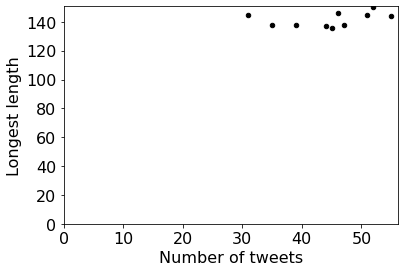

In [10]:
#q6
scatter(user_num_tweet_dic, user_to_length, xlabel = "Number of tweets", ylabel = "Longest length")

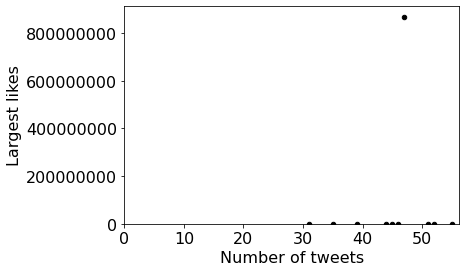

In [11]:
#q7
scatter(user_num_tweet_dic, largest_like, xlabel = "Number of tweets", ylabel = "Largest likes")

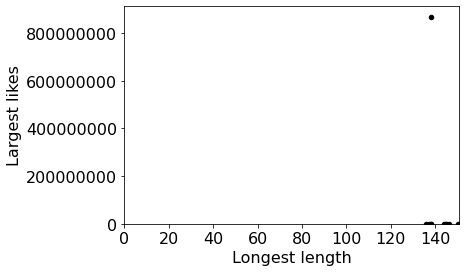

In [12]:
#q8
scatter(user_to_length, largest_like, xlabel = "Longest length", ylabel = "Largest likes")

In [13]:
#q9
sorted(largest_like.items(), key = lambda u:u[1])[-1][0]

'USERID_2'

In [14]:
#q10
outlier = sorted(largest_like.items(), key = lambda u:u[1])[-1][0]
def get_num_liked(tweet):
    return tweet.num_liked
sorted(user_dic[outlier], key = get_num_liked, reverse = True)

[Tweet(tweet_id='1467894593', username='USERID_2', num_liked=869000000, length=136),
 Tweet(tweet_id='1467875163', username='USERID_2', num_liked=9891, length=69),
 Tweet(tweet_id='1467862806', username='USERID_2', num_liked=9465, length=68),
 Tweet(tweet_id='1467907751', username='USERID_2', num_liked=9048, length=110),
 Tweet(tweet_id='1467928764', username='USERID_2', num_liked=9026, length=41),
 Tweet(tweet_id='1467943007', username='USERID_2', num_liked=9000, length=130),
 Tweet(tweet_id='1467918682', username='USERID_2', num_liked=8884, length=102),
 Tweet(tweet_id='1467935121', username='USERID_2', num_liked=8740, length=37),
 Tweet(tweet_id='1467947913', username='USERID_2', num_liked=8578, length=36),
 Tweet(tweet_id='1467892667', username='USERID_2', num_liked=8270, length=20),
 Tweet(tweet_id='1467897316', username='USERID_2', num_liked=7890, length=64),
 Tweet(tweet_id='1467854917', username='USERID_2', num_liked=7741, length=30),
 Tweet(tweet_id='1467961106', username='USE

In [15]:
#q11
no_outlier = sorted(user_dic[outlier], key = get_num_liked, reverse = True)[1:]
total = 0
for tweet in no_outlier:
    total += tweet.num_liked
total / len(no_outlier)

5003.565217391304

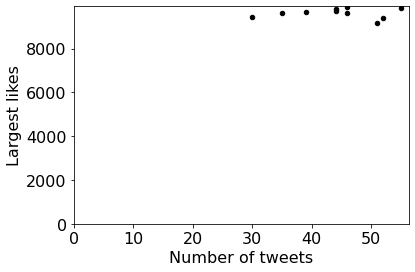

In [16]:
#q12
no_top_3 = sorted(full_data, key = get_num_liked, reverse = True)[3:]
no_top_3_dic = bucketize(no_top_3, "username")

user_num_tweet = {}
for data in no_top_3:
    if data.username not in user_num_tweet:
        user_num_tweet[data.username] = 0
    user_num_tweet[data.username] += 1
x_axis = user_num_tweet

largest_liked = {}
for username in no_top_3_dic:
    largest = 0
    user = no_top_3_dic[username]
    for i in range(len(user)):
        if largest == 0 or user[i].num_liked > largest:
            largest = user[i].num_liked
    largest_liked[username] = largest
y_axis = largest_liked
scatter(x_axis, y_axis, xlabel = "Number of tweets", ylabel = "Largest likes")

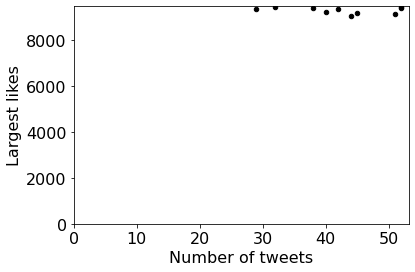

In [17]:
#q13
no_top_20 = sorted(full_data, key = get_num_liked, reverse = True)[20:]
no_top_20_dic = bucketize(no_top_20, "username")

user_num_tweet2 = {}
for data in no_top_20:
    if data.username not in user_num_tweet2:
        user_num_tweet2[data.username] = 0
    user_num_tweet2[data.username] += 1
x_axis = user_num_tweet2

largest_liked2 = {}
for username in no_top_20_dic:
    largest = 0
    user = no_top_20_dic[username]
    for i in range(len(user)):
        if largest == 0 or user[i].num_liked > largest:
            largest = user[i].num_liked
    largest_liked2[username] = largest
y_axis = largest_liked2
scatter(x_axis, y_axis, xlabel = "Number of tweets", ylabel = "Largest likes")

In [18]:
#q14
def recursive_find(dir_path):
    files = os.listdir(dir_path)
    path_list = []
    for file in files:
        if not file.startswith('.'):
            path = os.path.join(dir_path,file)
            if not os.path.isdir(path):
                path_list.append(path)
            else:
                path_list.extend(recursive_find(path))
    return sorted(path_list)

play_rb = os.path.join('play','rb')
recursive_find(play_rb)

['play/rb/ppt.ppt', 'play/rb/rb9/12.xls', 'play/rb/rb9/89.csv']

In [19]:
#q15
play_ls_qwe = os.path.join('play','ls','qwe')
recursive_find(play_ls_qwe)

['play/ls/qwe/iuqwe.json', 'play/ls/qwe/usun.pdf']

In [20]:
#q16
recursive_find('play')

['play/ls/lu.txt',
 'play/ls/mf.py',
 'play/ls/qwe/iuqwe.json',
 'play/ls/qwe/usun.pdf',
 'play/ou/a',
 'play/ou/b',
 'play/ou/quap/aoq/aqnsa',
 'play/ou/quap/aoq/qsonj',
 'play/ou/quap/qonxu.txt',
 'play/ou/quap/uikwe',
 'play/ou/v',
 'play/rb/ppt.ppt',
 'play/rb/rb9/12.xls',
 'play/rb/rb9/89.csv']

In [21]:
#q17
rec_others = os.path.join('recursive', 'others')
recursive_find(rec_others)

['recursive/others/USERID_10.json',
 'recursive/others/USERID_5.json',
 'recursive/others/USERID_6.json',
 'recursive/others/USERID_7.json',
 'recursive/others/USERID_8.json',
 'recursive/others/USERID_9.json']

In [22]:
#q18
rec = recursive_find('recursive')
rec

['recursive/USERID_1/tweets.json',
 'recursive/USERID_2/tweets.json',
 'recursive/USERID_3/tweets.json',
 'recursive/USERID_4/1.csv',
 'recursive/USERID_4/1.json',
 'recursive/USERID_4/2.csv',
 'recursive/USERID_4/2.json',
 'recursive/USERID_4/false/tweets.json',
 'recursive/USERID_4/true/tweets.json',
 'recursive/others/USERID_10.json',
 'recursive/others/USERID_5.json',
 'recursive/others/USERID_6.json',
 'recursive/others/USERID_7.json',
 'recursive/others/USERID_8.json',
 'recursive/others/USERID_9.json']

In [23]:
#q19
userid_4 = recursive_find(os.path.join('recursive', 'USERID_4'))
userid_4_tweets = []
for file in userid_4:
    if ".CSV" in file.upper():
        userid_4_tweets.extend(get_csv_tweets(file))
    elif ".JSON" in file.upper():
        userid_4_tweets.extend(get_json_tweets(file))
len(userid_4_tweets)

37

In [24]:
#q20
rec_tweets = []
for file in rec:
    if ".CSV" in file.upper():
        rec_tweets.extend(get_csv_tweets(file))
    elif ".JSON" in file.upper():
        rec_tweets.extend(get_json_tweets(file))
len(rec_tweets)

220